In [6]:
import pandas as pd

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\phishing_site_urls.csv\phishing_site_urls.csv")
print(df.head())


                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [8]:
print(df.columns)


Index(['URL', 'Label'], dtype='object')


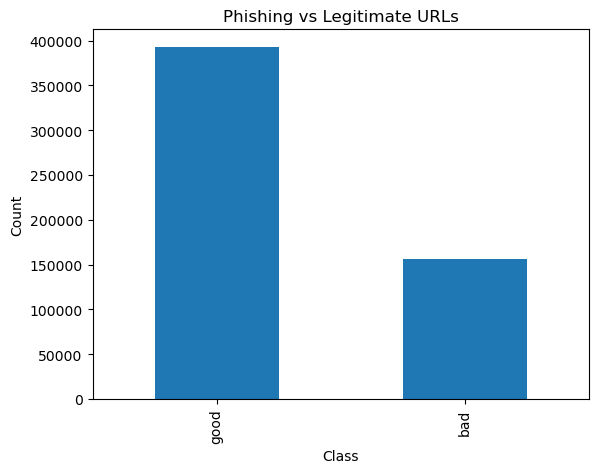

In [10]:
df['Label'].value_counts().plot(kind='bar')
plt.title("Phishing vs Legitimate URLs")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


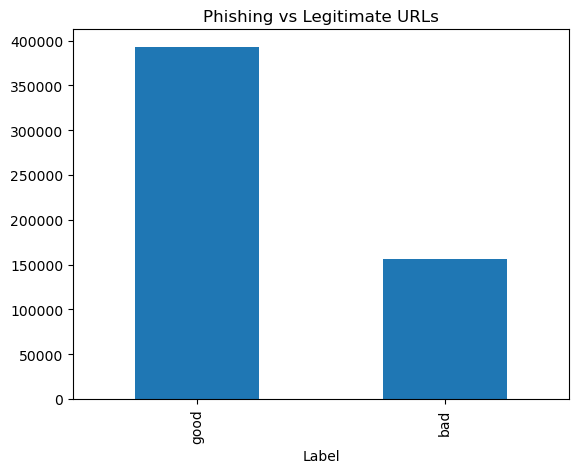

In [9]:
import matplotlib.pyplot as plt

df['Label'].value_counts().plot(kind='bar')
plt.title("Phishing vs Legitimate URLs")
plt.show()


In [12]:
# Create new features
df['length_url'] = df['URL'].apply(len)
df['num_digits'] = df['URL'].apply(lambda x: sum(c.isdigit() for c in x))

print(df.head())


                                                 URL Label  length_url  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad         225   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad          81   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad         177   
3  mail.printakid.com/www.online.americanexpress....   bad          60   
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad         116   

   num_digits  
0          58  
1           1  
2          47  
3           0  
4          21  


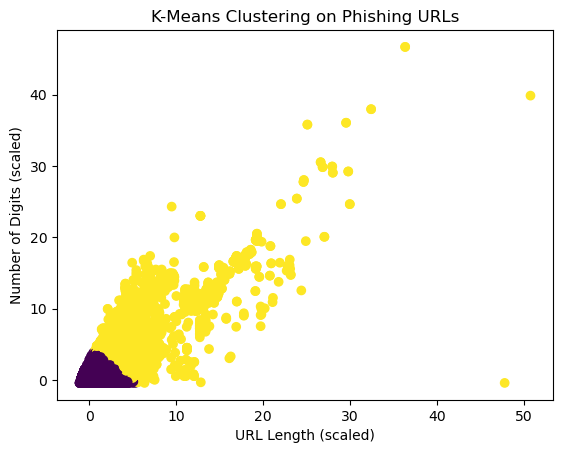

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features
X = df[['length_url', 'num_digits']]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.xlabel("URL Length (scaled)")
plt.ylabel("Number of Digits (scaled)")
plt.title("K-Means Clustering on Phishing URLs")
plt.show()


In [14]:
df['Cluster'] = labels
print(df[['URL', 'Label', 'Cluster']].head(10))


                                                 URL Label  Cluster
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad        1
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad        0
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad        1
3  mail.printakid.com/www.online.americanexpress....   bad        0
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad        0
5               smilesvoegol.servebbs.org/voegol.php   bad        0
6  premierpaymentprocessing.com/includes/boleto-2...   bad        0
7  myxxxcollection.com/v1/js/jih321/bpd.com.do/do...   bad        0
8                                super1000.info/docs   bad        0
9  horizonsgallery.com/js/bin/ssl1/_id/www.paypal...   bad        1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Convert URLs into numerical features (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['URL'])

# Target labels (Phishing / Legitimate)
y = df['Label']

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9631137593747725

Confusion Matrix:
 [[ 43566   3184]
 [  2895 115159]]

Classification Report:
               precision    recall  f1-score   support

         bad       0.94      0.93      0.93     46750
        good       0.97      0.98      0.97    118054

    accuracy                           0.96    164804
   macro avg       0.96      0.95      0.95    164804
weighted avg       0.96      0.96      0.96    164804



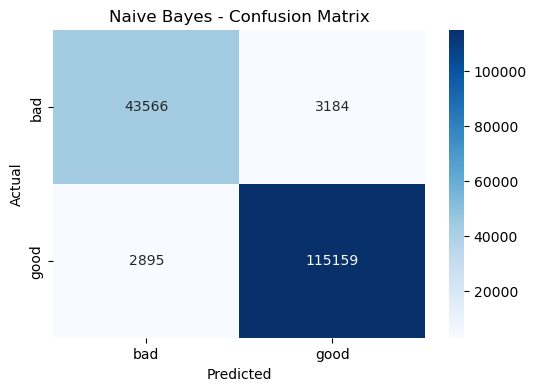

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


In [20]:
import pandas as pd  

# Apna actual path lagao yahan
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\phishing_site_urls.csv\phishing_site_urls.csv")

# Pehle 5 rows dekhne ke liye
print(df.head())

# Dataset ka size dekhne ke liye
print("Rows, Columns:", df.shape)

# Column names dekhne ke liye
print("Columns:", df.columns)


                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad
Rows, Columns: (549346, 2)
Columns: Index(['URL', 'Label'], dtype='object')


In [21]:
import pandas as pd

# URL length
df['url_length'] = df['URL'].apply(len)

# Number of digits in URL
df['num_digits'] = df['URL'].apply(lambda x: sum(c.isdigit() for c in x))

# Number of special characters
df['num_special'] = df['URL'].apply(lambda x: sum(not c.isalnum() for c in x))

df[['URL', 'Label', 'url_length', 'num_digits', 'num_special']].head()


,URL,Label,url_length,num_digits,num_special
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,225,58,32
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,81,1,15
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,177,47,19
3,mail.printakid.com/www.online.americanexpress....,bad,60,0,8
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,116,21,13


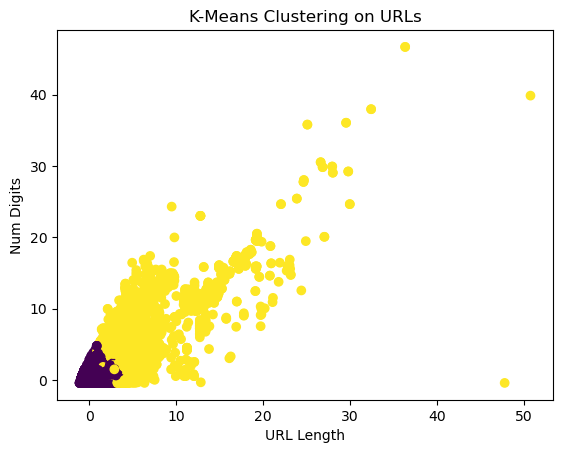

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Feature matrix
X = df[['url_length', 'num_digits', 'num_special']]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering (2 clusters: good/bad)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualization
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clustering on URLs")
plt.xlabel("URL Length")
plt.ylabel("Num Digits")
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Encode 'Label' into 0/1
le = LabelEncoder()
df['Label_encoded'] = le.fit_transform(df['Label'])  
# 'bad' -> 0, 'good' -> 1  (automatically set hoga)

# Confusion matrix & report
print("Confusion Matrix:")
print(confusion_matrix(df['Label_encoded'], df['Cluster']))

print("\nClassification Report:")
print(classification_report(df['Label_encoded'], df['Cluster']))


Confusion Matrix:
[[143917  12505]
 [391490   1434]]

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.92      0.42    156422
           1       0.10      0.00      0.01    392924

    accuracy                           0.26    549346
   macro avg       0.19      0.46      0.21    549346
weighted avg       0.15      0.26      0.12    549346



In [25]:
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'bad': 0, 'good': 1}
